In [1]:
import pandas as pd

In [2]:
ribao=pd.read_csv("D:\\pythonlearning\\MATplot\\fenri.csv",header=None,prefix="col")

In [3]:
ribao.head(5)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,调运日报,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020年12月4日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,全公司,NaN,NaN,矿1,NaN,NaN,矿2,NaN,NaN,矿3,NaN,NaN
3,NaN,NaN,当日,月累,年累,当日,月累,年累,当日,月累,年累,当日,月累,年累
4,总运量,车,60,316,49810,20,128,14052,0,0,22416,40,188,13342


In [4]:
ribao=ribao.dropna(axis=1, how='all')
ribao=ribao.dropna(axis=0, how='all')

In [5]:
ribao.head(10)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,调运日报,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020年12月4日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,全公司,NaN,NaN,矿1,NaN,NaN,矿2,NaN,NaN,矿3,NaN,NaN
3,NaN,NaN,当日,月累,年累,当日,月累,年累,当日,月累,年累,当日,月累,年累
4,总运量,车,60,316,49810,20,128,14052,0,0,22416,40,188,13342
5,NaN,吨,4069,21375,3375024,1355,8621,952441,0,0,1518883,2714,12754,903700
6,日均,车,NaN,79,147,NaN,32,42,NaN,0,66,NaN,47,39
7,NaN,吨,NaN,5344,9985,NaN,2155,2818,NaN,0,4494,NaN,3189,2674
8,1、低硫精煤,车,20,110,28646,20,110,12569,0,0,16077,0,0,0
9,NaN,吨,1355,7422,1941277,1355,7422,852382,0,0,1088895,0,0,0


In [6]:
#对数据进行处理
for i in range(5,len(ribao)):
    if ribao['col0'].isnull()[i]==True:
        print(i)
        ribao.loc[i,'col0']= ribao.loc[i-1,'col0']

5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65


In [7]:
yunliang=ribao[ribao.col1=="吨"]

In [8]:
che=ribao[ribao.col1=="车"]

In [23]:
che.head()

,index,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,4,总运量,车,60,316,49810,20,128,14052,0,0,22416,40,188,13342
1,6,日均,车,0,79,147,0,32,42,0,0,66,0,47,39
2,8,1、低硫精煤,车,20,110,28646,20,110,12569,0,0,16077,0,0,0
3,10,邯钢,车,0,0,2707,0,0,440,0,0,2267,0,0,0
4,12,承钢,车,0,0,60,0,0,0,0,0,60,0,0,0


In [10]:
#空值填充
yunliang=yunliang.fillna(value=0)
che=che.fillna(value=0)

In [21]:
che=che.reset_index()
yunliang=yunliang.reset_index()

In [29]:
#总运量，低硫精煤，高硫精煤，电煤，其他 对比图  全公司、矿1 矿2 矿3

allyunliang=yunliang.loc[[0,2,17,24,30],['col4','col7','col10','col13']]
allche=che.loc[[0,2,17,24,30],['col4','col7','col10','col13']]
allyunliang

,col4,col7,col10,col13
0,3375024,952441,1518883,903700
2,1941277,852382,1088895,0
17,207850,0,207850,0
24,1105001,100059,222138,782804
30,120896,0,0,120896


In [33]:
allche

,col4,col7,col10,col13
0,49810,14052,22416,13342
2,28646,12569,16077,0
17,3062,0,3062,0
24,16319,1483,3277,11559
30,1783,0,0,1783


In [28]:
#画图
import matplotlib.pyplot as plt
import numpy as np

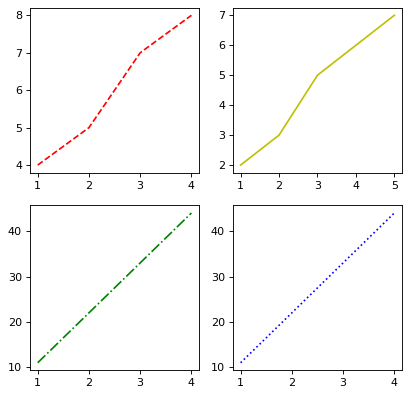

In [35]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(6,6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
plt.plot([1,2,3,4],[4,5,7,8], color="r",linestyle = "--")
ax2 = plt.subplot(222)
plt.plot([1,2,3,5],[2,3,5,7],color="y",linestyle = "-")
ax3 = plt.subplot(223)
plt.plot([1,2,3,4],[11,22,33,44],color="g",linestyle = "-.")
ax4 = plt.subplot(224)
plt.plot([1,2,3,4],[11,22,33,44],color="b",linestyle = ":")

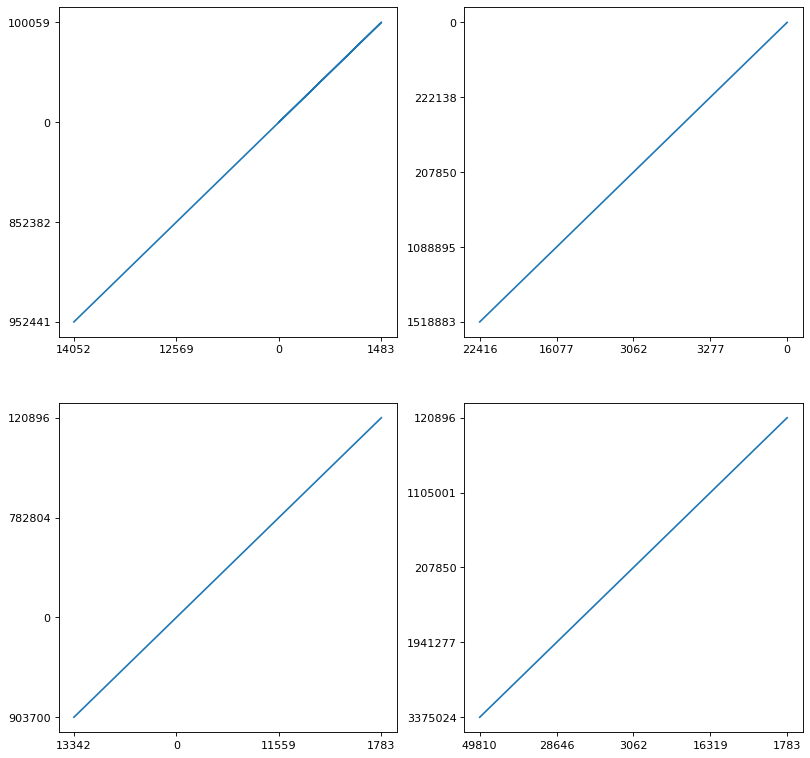

In [37]:
plt.figure(figsize=(12,12), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221) 
ax1.plot(allche['col7'], allyunliang['col7'], label='矿1') 
ax2 = plt.subplot(222)
ax2.plot(allche['col10'], allyunliang['col10'], label='矿2') 
ax3 = plt.subplot(223)
ax3.plot(allche['col13'], allyunliang['col13'], label='矿3')
ax4 = plt.subplot(224)
ax4.plot(allche['col4'], allyunliang['col4'], label='全公司') 
ax.set_xlabel('x label') 
ax.set_ylabel('y label') 
ax.set_title("Simple Plot")  
ax.legend() 